В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)
Этапы работы:

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
Подготовьте датасет к обучению моделей.
a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).
Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
Обучите дерево решений на обучающем множестве. Используйте следующие модели:
a) tree.DecisionTreeClassifier
b) ensemble.RandomForestClassifier
Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.
Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.
Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
a) Повторите п. 5
Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.
a) Повторите п. 5
Сформулируйте выводы по проделанной работе.
a) Сравните метрики построенных моделей.
b) Напишите свое мнение, какая модель наилучшая и почему.
Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.
Результат: получены знания по использованию базовых ансамблевых методов.

#Подготовка данных


##Блок "импорта"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import numpy as np
#from sklearn import datasets
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.model_selection import cross_val_score
#from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier

##Загрузка данных

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


##Преобразование данных

In [ ]:
le = LabelEncoder()
le.fit(data['Sex'])
data['Sex'] = pd.Series(data = le.transform(data['Sex']))
ea = LabelEncoder()
ea.fit(data['ExerciseAngina'])
data['ExerciseAngina'] = pd.Series(data = ea.transform(data['ExerciseAngina']))
data = pd.get_dummies(data, columns=['ChestPainType','RestingECG','ST_Slope'])

##Разделение данных

In [ ]:
X = data.copy()
y = data['HeartDisease']
del X['HeartDisease']
train_x, test_x, train_y , test_y = train_test_split(X, y, test_size = 0.2, random_state = 10)

#Дерево классов и случайный лес

In [ ]:
TreeClass = DecisionTreeClassifier(random_state = 10,max_depth = 3)
TreeClass.fit(train_x,train_y)
RandomForest = RandomForestClassifier(random_state = 10,max_depth = 3)
RandomForest.fit(train_x,train_y)
predTC = TreeClass.predict(test_x)
predRF = RandomForest.predict(test_x)

##Важность

In [ ]:
imp = pd.Series(RandomForest.feature_importances_)
imp.index = pd.Series(train_x.columns)
imp = imp.sort_values(ascending=False)
imp

ST_Slope_Up          0.284069
ChestPainType_ASY    0.182986
ST_Slope_Flat        0.168178
Oldpeak              0.076093
ExerciseAngina       0.075189
MaxHR                0.048242
ChestPainType_ATA    0.041484
Sex                  0.031203
Cholesterol          0.030263
Age                  0.026936
ChestPainType_NAP    0.009351
RestingBP            0.008469
FastingBS            0.008442
ST_Slope_Down        0.005255
RestingECG_LVH       0.001906
ChestPainType_TA     0.001223
RestingECG_Normal    0.000590
RestingECG_ST        0.000122
dtype: float64

##График важности

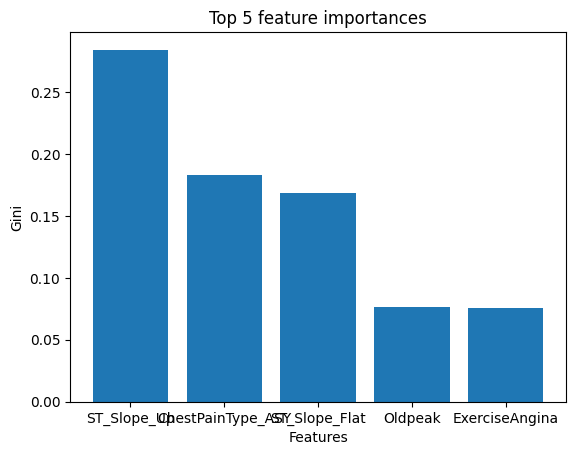

In [ ]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.show()

##Репорт дерево классов и случайный лес

In [ ]:
print('Report for TreeClass: \n',classification_report(test_y, predTC))
print('\nReport for RandomForest: \n',classification_report(test_y, predRF))

Report for TreeClass: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        86
           1       0.84      0.81      0.82        98

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184


Report for RandomForest: 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82        86
           1       0.83      0.89      0.86        98

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



#"Баггинг"

In [ ]:
Bag = BaggingClassifier(TreeClass, n_estimators=10, random_state=10)
Bag.fit(train_x,train_y)
predBag = Bag.predict(test_x)

##Репорт "баггинга"

In [ ]:
print('\nReport for BaggingClassifier: \n',classification_report(test_y, predBag))


Report for BaggingClassifier: 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        86
           1       0.85      0.84      0.85        98

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



#SVC

In [ ]:
svc = LinearSVC(random_state = 10)
svc.fit(train_x,train_y)
predsvc = svc.predict(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##Репорт SVC

In [ ]:
print('\nReport for LinearSVC: \n',classification_report(test_y, predsvc))


Report for LinearSVC: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.53      0.99      0.69        98

    accuracy                           0.53       184
   macro avg       0.27      0.49      0.35       184
weighted avg       0.28      0.53      0.37       184



#"Стакинг"

In [ ]:
estimator = [('TreeClass',TreeClass),
             ('RandomForest',RandomForest),
             ('svc',svc)]
stack = StackingClassifier(estimators = estimator)
stack.fit(train_x,train_y)
predst = stack.predict(test_x);

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

##Репорт "стакинга"

In [ ]:
print('\nReport for StackingClassifier: \n',classification_report(test_y, predst))


Report for StackingClassifier: 
               precision    recall  f1-score   support

           0       0.88      0.76      0.81        86
           1       0.81      0.91      0.86        98

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



# Репорт всех

In [ ]:
print('Report for TreeClass: \n',classification_report(test_y, predTC))
print('\nReport for RandomForest: \n',classification_report(test_y, predRF))
print('\nReport for BaggingClassifier: \n',classification_report(test_y, predBag))
print('\nReport for LinearSVC: \n',classification_report(test_y, predsvc))
print('\nReport for StackingClassifier: \n',classification_report(test_y, predst))

Report for TreeClass: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        86
           1       0.84      0.81      0.82        98

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184


Report for RandomForest: 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82        86
           1       0.83      0.89      0.86        98

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184


Report for BaggingClassifier: 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        86
           1       0.85      0.84      0.85        98

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84

##Score

In [ ]:
a = '\n'
print('TreeClass',TreeClass.score(test_x,test_y),a)
print('RandomForest',RandomForest.score(test_x,test_y),a)
print('Bag',Bag.score(test_x,test_y),a)
print('svc',svc.score(test_x,test_y),a)
print('stack',stack.score(test_x,test_y),a)

TreeClass 0.8152173913043478 

RandomForest 0.842391304347826 

Bag 0.8369565217391305 

svc 0.5271739130434783 

stack 0.8369565217391305 

